In [1]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#importing the file
btc=pd.read_csv('BTC-USD.csv')
doge=pd.read_csv('DOGE-USD.csv')
eth=pd.read_csv('ETH-USD.csv')

In [10]:
#Printing the data
print(btc.head(2))
print(doge.head(2))
print(eth.head(2))

         Date          Open          High           Low         Close  \
0  2020-11-17  16685.691406  17782.919922  16564.544922  17645.406250   
1  2020-11-18  17645.191406  18393.949219  17352.906250  17804.005859   

      Adj Close       Volume  
0  17645.406250  39006849170  
1  17804.005859  49064800278  
         Date      Open      High       Low     Close  Adj Close    Volume
0  2020-11-17  0.002908  0.002976  0.002886  0.002936   0.002936  46631464
1  2020-11-18  0.002936  0.002999  0.002855  0.002909   0.002909  49460064
         Date        Open        High         Low       Close   Adj Close  \
0  2020-11-17  464.406647  482.232208  460.776611  480.360077  480.360077   
1  2020-11-18  480.346832  491.999908  465.830963  479.484070  479.484070   

        Volume  
0  14593057877  
1  17880199224  


In [11]:
#Create a new dataframe that holds the closing price of all the currency

In [13]:
#Creating dictionary
df=pd.DataFrame({'BTC':btc['Close'],
                 'ETH':eth['Close'],
                 'DOGE':doge['Close']
                 
                 
                }
                 
                 
                 
                 
                 
                 )

In [14]:
df

,BTC,ETH,DOGE
0,17645.406250,480.360077,0.002936
1,17804.005859,479.484070,0.002909
2,17817.089844,471.630432,0.002911
3,18621.314453,509.744568,0.002984
4,18642.232422,549.486633,0.003507
...,...,...,...
361,64469.527344,4651.460449,0.261706
362,65466.839844,4626.358887,0.262912
363,63557.871094,4557.503906,0.256529
364,60161.246094,4216.365234,0.237249


In [15]:
#get statistics on the data
df.describe()

,BTC,ETH,DOGE
count,366.000000,366.000000,366.000000
mean,43663.033443,2349.952427,0.181726
std,12882.304486,1107.694266,0.142785
min,17108.402344,471.630432,0.002909
25%,34345.874024,1617.314758,0.051100
50%,44940.628907,2232.549926,0.207822
75%,55016.893555,3226.773011,0.272026
max,67566.828125,4812.087402,0.684777


In [16]:
#Visualize the closing price of closing price

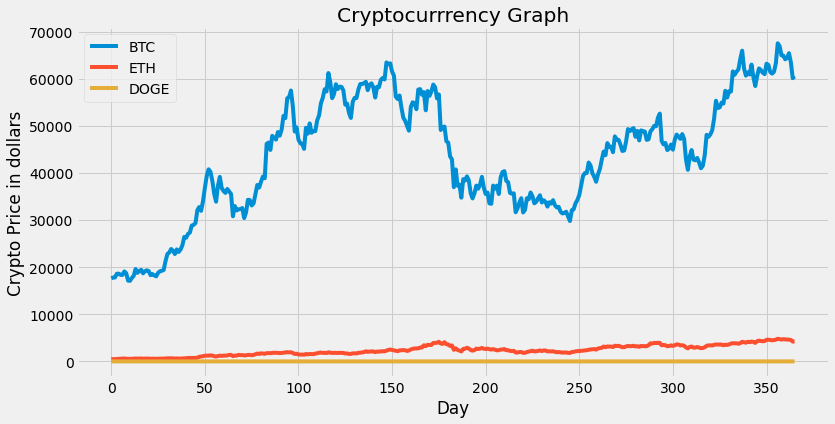

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
for c in df.columns.values:
    plt.plot(df[c],label=c)
plt.title('Cryptocurrrency Graph')
plt.xlabel('Day')
plt.ylabel('Crypto Price in dollars')
plt.legend(df.columns.values,loc='upper left')
plt.show()

In [24]:
#Scale the data
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,100))
scaled=min_max_scaler.fit_transform(df)
scaled

array([[1.06425022e+00, 2.01122717e-01, 3.95971068e-03],
       [1.37856761e+00, 1.80940349e-01, 0.00000000e+00],
       [1.40449784e+00, 0.00000000e+00, 2.93311902e-04],
       ...,
       [9.20549304e+01, 9.41346384e+01, 3.71948823e+01],
       [8.53233986e+01, 8.62751279e+01, 3.43673556e+01],
       [8.60372056e+01, 8.63513210e+01, 3.44681082e+01]])

In [29]:
#Convert the scaled data into a dataframe
df_scale=pd.DataFrame(scaled,columns=df.columns)


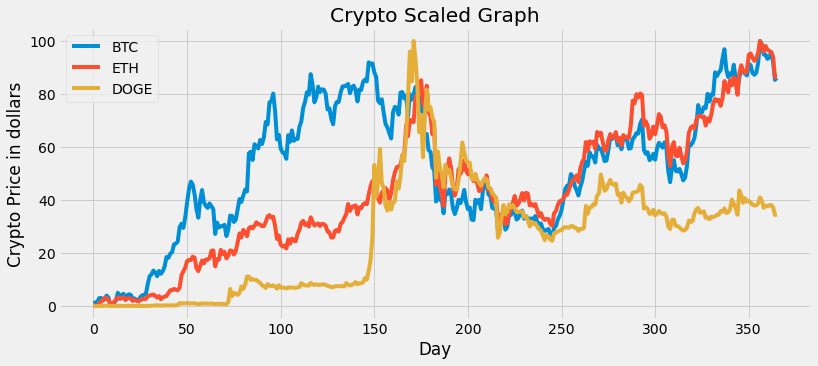

In [30]:
my_crypto=df_scale
plt.figure(figsize=(12,5))
for c in my_crypto.columns.values:
    plt.plot(my_crypto[c],label=c)
plt.title('Crypto Scaled Graph')
plt.xlabel('Day')
plt.ylabel('Crypto Price in dollars')
plt.legend(df.columns.values,loc='upper left')
plt.show()

In [31]:
#get the daily simple return 
DSR=df.pct_change(1)
DSR

,BTC,ETH,DOGE
0,NaN,NaN,NaN
1,0.008988,-0.001824,-0.009196
2,0.000735,-0.016379,0.000688
3,0.045138,0.080814,0.025077
4,0.001123,0.077965,0.175268
...,...,...,...
361,0.004888,-0.003354,0.008835
362,0.015470,-0.005396,0.004608
363,-0.029159,-0.014883,-0.024278
364,-0.053441,-0.074852,-0.075157


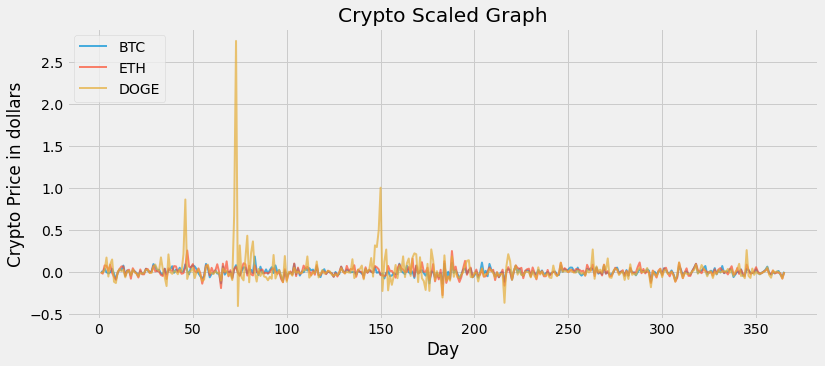

In [35]:
#Visuale the daily simple returns
plt.figure(figsize=(12,5))
for c in DSR.columns.values:
    plt.plot(DSR.index,DSR[c],label='x',lw=2,alpha=.7)
plt.title('Crypto Scaled Graph')
plt.xlabel('Day')
plt.ylabel('Crypto Price in dollars')
plt.legend(DSR.columns.values,loc='upper left')
plt.show()

In [36]:
#Get the volatility which is also called standard deviation
print('The cryptocurrency volatility')
DSR.std()

The cryptocurrency volatility


BTC     0.042244
ETH     0.056558
DOGE    0.189709
dtype: float64

In [37]:
#show the mean o average daily return
DSR.mean()

BTC     0.004270
ETH     0.007572
DOGE    0.022482
dtype: float64

In [38]:
#Get the correlation 
DSR.corr()

,BTC,ETH,DOGE
BTC,1.000000,0.750351,0.302300
ETH,0.750351,1.000000,0.257773
DOGE,0.302300,0.257773,1.000000


<AxesSubplot:>

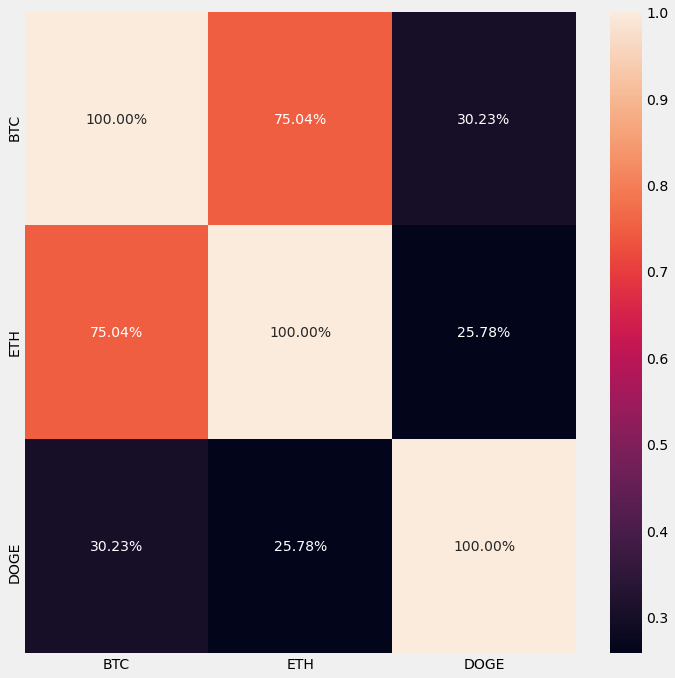

In [41]:
#visualize the correlation
import seaborn as sns

plt.subplots(figsize=(11,11))
sns.heatmap(DSR.corr(),annot=True,fmt='.2%')


In [42]:
#Get the daily cumulative simple returns
DCSR=(DSR+1).cumprod()
DCSR

,BTC,ETH,DOGE
0,NaN,NaN,NaN
1,1.008988,0.998176,0.990804
2,1.009730,0.981827,0.991485
3,1.055307,1.061172,1.016349
4,1.056492,1.143906,1.194482
...,...,...,...
361,3.653615,9.683279,89.136921
362,3.710135,9.631023,89.547684
363,3.601950,9.487683,87.373638
364,3.409457,8.777510,80.806880


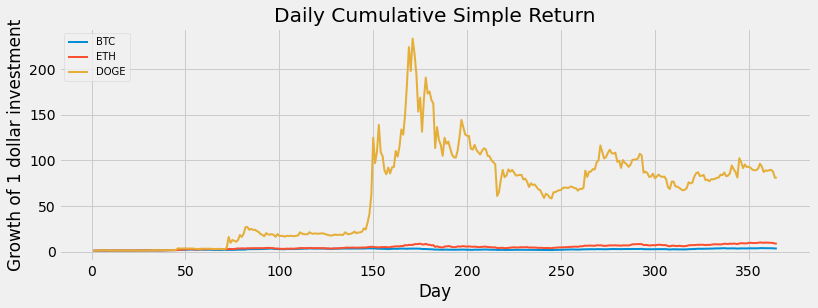

In [44]:
#Visualize the daily cumulative simple returns
plt.figure(figsize=(12,4))
for c in DCSR.columns.values:
    plt.plot(DCSR.index,DCSR[c],lw=2,label=c)
plt.title('Daily Cumulative Simple Return')
plt.xlabel('Day')
plt.ylabel('Growth of 1 dollar investment')
plt.legend(DCSR.columns.values,loc='upper left',fontsize=10)
plt.show()